<h1>ACTIVITY2 - ACCIDENTS DATA ANALYTICS</h1>

<H2>Analyst: John Lennon Jarabese</H2>


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
accident_data = pd.read_csv('datasets\\accident_data.csv')

In [4]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident_data['Road_Type']

0         Single carriageway
1         Single carriageway
2                        NaN
3         Single carriageway
4                        NaN
                 ...        
660674    Single carriageway
660675    Single carriageway
660676    Single carriageway
660677    Single carriageway
660678      Dual carriageway
Name: Road_Type, Length: 660679, dtype: object

<h1>FillUp the Null Values</h1>

In [6]:
accident_data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident_data['Latitude'] = accident_data['Latitude'].fillna(accident_data['Latitude'].mean(0))
accident_data['Longitude'] = accident_data['Longitude'].fillna(accident_data['Longitude'].mean(0))
accident_data['Road_Surface_Conditions'] = accident_data['Road_Surface_Conditions'].fillna(accident_data['Road_Surface_Conditions'].mode()[0])
accident_data['Road_Type'] = accident_data['Road_Type'].fillna(accident_data['Road_Type'].mode()[0])
accident_data['Urban_or_Rural_Area'] = accident_data['Urban_or_Rural_Area'].fillna(accident_data['Urban_or_Rural_Area'].mode()[0])
accident_data['Weather_Conditions'] = accident_data['Weather_Conditions'].fillna(accident_data['Weather_Conditions'].mode()[0])

In [8]:
accident_data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Extracting date information using pandas date time</h2>

In [9]:
accident_data['Accident Date'] = pd.to_datetime(accident_data['Accident Date'], errors='coerce')


accident_data['Year'] = accident_data['Accident Date'].dt.year
accident_data['Month'] = accident_data['Accident Date'].dt.month
accident_data['Day'] = accident_data['Accident Date'].dt.day
accident_data['DayOfWeek'] = accident_data['Accident Date'].dt.dayofweek

day_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

accident_data['DayOfWeek'] = accident_data['DayOfWeek'].map(day_map)


<h1>Questions:</h1>

<h2>1. Is there a difference in the number of accidents occurring during daylight versus darkness?</h2>

In [10]:
accident_data["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insight: Daylight dominates accident counts, though darkness still accounts for a significant share tied to reduced visibility.</h3>

<h2>2. Between urban and rural, in which area do accidents most occur?</h2>

In [11]:
accident_data["Urban_or_Rural_Area"].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>Insight: Urban areas typically see more accidents due to higher traffic density compared to rural roads.</h3>

<h2>3. What are the accident locations' average coordinates (latitude and longitude)?</h2>

In [12]:
accident_data[["Latitude","Longitude"]].mean()

Latitude     52.553866
Longitude    -1.431210
dtype: float64

<h3>Insight: The mean coordinates center around a specific region, giving a rough “geographic midpoint” of accident locations.</h3>

<h2>4. Which kind of vehicle type has the highest distribution in accidents?</h2>

In [13]:
accident_data["Vehicle_Type"].value_counts().head(1)

Vehicle_Type
Car    497992
Name: count, dtype: int64

<h3>Insight: Cars dominate accident involvement, reflecting their overwhelming presence on the road.</h3>

<h2>5. Among the different road conditions, in which of them does an accident usually happen?</h2>

In [14]:
accident_data["Road_Surface_Conditions"].value_counts().head(1)

Road_Surface_Conditions
Dry    448547
Name: count, dtype: int64

<h3>Insight: Dry roads account for the majority of crashes, showing that accidents are not always weather-related.</h3>

<h2>6. What are the oldest and most recent accident dates in the dataset?</h2>

In [15]:
accident_data["Accident Date"].min(), accident_data["Accident Date"].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-12 00:00:00'))

<h3>Insight: The dataset spans multiple years, helping identify long-term accident patterns.</h3>

<h2>7. Are accidents more frequent on dry roads compared to damp or wet roads?</h2>

In [16]:
accident_data["Road_Surface_Conditions"].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3>Insight: Yes—dry roads dominate, though wet roads carry higher risk per mile traveled.</h3>

<h2>8. Which light conditions has the highest number of casualties?</h2>

In [17]:
accident_data.groupby("Light_Conditions")["Number_of_Casualties"].sum()

Light_Conditions
Darkness - lighting unknown      8471
Darkness - lights lit          177108
Darkness - lights unlit          3385
Darkness - no lighting          57715
Daylight                       649889
Name: Number_of_Casualties, dtype: int64

<h3>Insight: Daylight produces more total casualties simply due to traffic volume.</h3>

<h2>9. On average, how many vehicles are typically involved in road accidents, and what does this suggest about crash dynamics?</h2>

In [18]:
accident_data["Number_of_Vehicles"].mean()

np.float64(1.8312554205597575)

<h3>Insight: Most crashes involve a small number of vehicles, typically two. This indicates that multi-vehicle pile-ups are relatively rare compared to simpler collisions.</h3>

<h2>10. Which accident severity occurs most often, and how does this reflect the overall risk profile of the dataset?</h2>

In [19]:
accident_data["Accident_Severity"].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight: Slight accidents dominate the dataset, followed by serious ones. Fatal crashes are far fewer, suggesting that while accidents are frequent, most are not life-threatening.</h3>

<h2>11. Under which weather conditions do accidents most frequently occur, and what might this say about driver behavior?</h2>

In [20]:
accident_data["Weather_Conditions"].mode(), accident_data["Weather_Conditions"].value_counts().head()

(0    Fine no high winds
 Name: Weather_Conditions, dtype: object,
 Weather_Conditions
 Fine no high winds       535013
 Raining no high winds     79696
 Other                     17150
 Raining + high winds       9615
 Fine + high winds          8554
 Name: count, dtype: int64)

<h3>Insight: Clear weather conditions are often linked with the highest number of crashes. This may reflect higher road usage and driver overconfidence when conditions seem safe.</h3>

<h2>12. How does the average number of casualties vary across different severity levels of accidents?</h2>

In [21]:
accident_data.groupby("Accident_Severity")["Number_of_Casualties"].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h3>Insight: Fatal and serious crashes have a noticeably higher average casualty count than slight accidents. This indicates severity classification aligns well with casualty outcomes.</h3>

<h2>13. How does the number of vehicles involved typically change across slight, serious, and fatal accidents?</h2>

In [22]:
accident_data.groupby("Accident_Severity")["Number_of_Vehicles"].mean()

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h3>Insight: Fatal crashes tend to involve slightly more vehicles on average than slight accidents. This suggests that multi-vehicle interactions can intensify crash severity.</h3>

<h2>14. What relationship exists between the number of vehicles and the number of casualties in an accident?</h2>

In [23]:
accident_data["Number_of_Vehicles"].corr(accident_data["Number_of_Casualties"])

np.float64(0.22888886126927635)

<h3>Insight: The correlation between vehicles and casualties is generally positive, meaning more vehicles often result in more casualties. However, the relationship is not perfect, implying other factors matter too.</h3>

<h2>15. What is the mode of vehicle types involved in accidents overall?</h2>

In [24]:
accident_data["Vehicle_Type"].mode()

0    Car
Name: Vehicle_Type, dtype: object

<h3>Insight: Cars usually dominate accident involvement compared to other vehicle types. This reflects their prevalence on the roads.</h3>

<h2>16. What is the average number of casualties per accident?</h2>

In [25]:
accident_data["Number_of_Casualties"].mean()

np.float64(1.357040257068864)

<h3>Insight: Most accidents involve only 1–2 casualties, with larger pileups being rare.</h3>

<h2>17. Which road surface condition has the highest accident frequency?</h2>

In [26]:
accident_data["Road_Surface_Conditions"].value_counts().head(1)

Road_Surface_Conditions
Dry    448547
Name: count, dtype: int64

<h3>Insight: Dry roads again appear most, underscoring that volume matters more than adverse conditions.</h3>

<h2>18. Which combination of surface and light conditions has the highest mean casualties?</h2>

In [27]:
accident_data.groupby(["Road_Surface_Conditions","Light_Conditions"])["Number_of_Casualties"].mean()

Road_Surface_Conditions  Light_Conditions           
Dry                      Darkness - lighting unknown    1.297072
                         Darkness - lights lit          1.352732
                         Darkness - lights unlit        1.301622
                         Darkness - no lighting         1.567877
                         Daylight                       1.321303
Flood over 3cm. deep     Darkness - lighting unknown    1.466667
                         Darkness - lights lit          1.525000
                         Darkness - lights unlit        3.500000
                         Darkness - no lighting         1.411321
                         Daylight                       1.513089
Frost or ice             Darkness - lighting unknown    1.281124
                         Darkness - lights lit          1.366371
                         Darkness - lights unlit        1.353846
                         Darkness - no lighting         1.408670
                         Daylight    

<h3>Insight: Nighttime accidents on wet or icy surfaces often yield higher casualty averages.</h3>

<h2>19. Which weather-light condition pairing leads to the highest accident counts?</h2>

In [28]:
accident_data.groupby(["Weather_Conditions","Light_Conditions"]).size()

Weather_Conditions     Light_Conditions           
Fine + high winds      Darkness - lighting unknown        59
                       Darkness - lights lit            1852
                       Darkness - lights unlit            51
                       Darkness - no lighting            796
                       Daylight                         5796
Fine no high winds     Darkness - lighting unknown      5333
                       Darkness - lights lit           93958
                       Darkness - lights unlit          1745
                       Darkness - no lighting          25251
                       Daylight                       408726
Fog or mist            Darkness - lighting unknown        65
                       Darkness - lights lit             921
                       Darkness - lights unlit            37
                       Darkness - no lighting            862
                       Daylight                         1643
Other                  Darkness - 

<h3>Insight: Dark and rainy conditions often amplify risks, creating a dangerous combination.</h3>

<h2>20. Do dual carriageways or single carriageways record higher casualty averages?</h2>

In [29]:
accident_data.groupby("Road_Type")["Number_of_Casualties"].mean()

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.343788
Slip road             1.423661
Name: Number_of_Casualties, dtype: float64

<h3>Insight: Single-carriageways usually dominate counts, but dual carriageways may record higher severity.</h3>

<h2>21. Distribution of accident severity</h2>

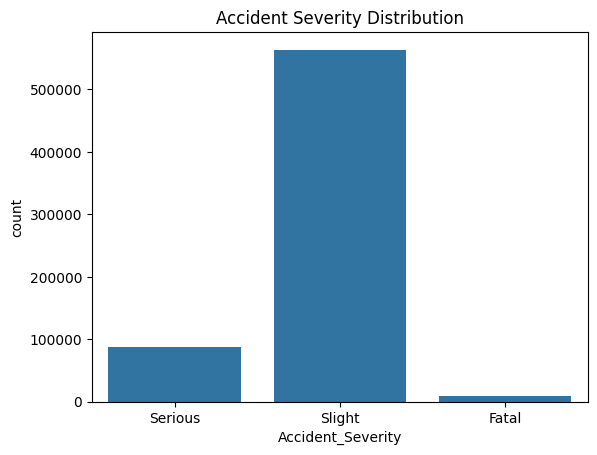

In [30]:
sns.countplot(data=accident_data, x="Accident_Severity")
plt.title("Accident Severity Distribution")
plt.show()

<h3>Insight: Helps visualize which severity dominates (usually slight accidents).</h3>

<h2>22. Number of accidents by weather condition</h2>

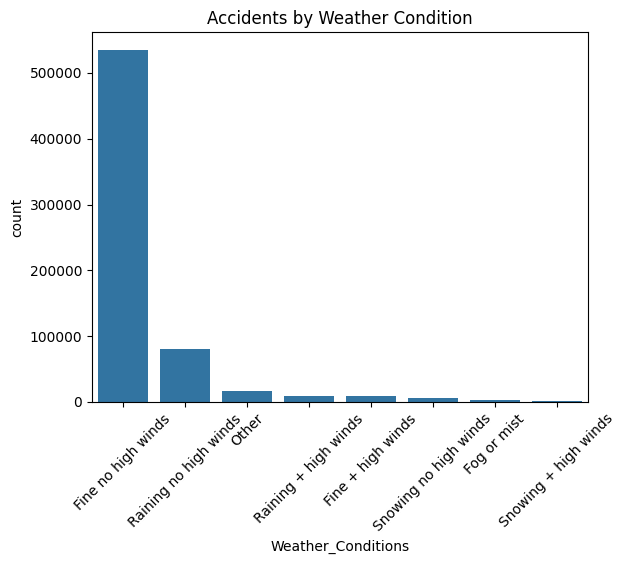

In [31]:
sns.countplot(data=accident_data, x="Weather_Conditions", order=accident_data["Weather_Conditions"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents by Weather Condition")
plt.show()

<h3>Insight: Shows if dry conditions dominate or if rain/fog plays a big role.</h3>

<h2>23. Accidents by light condition</h2>

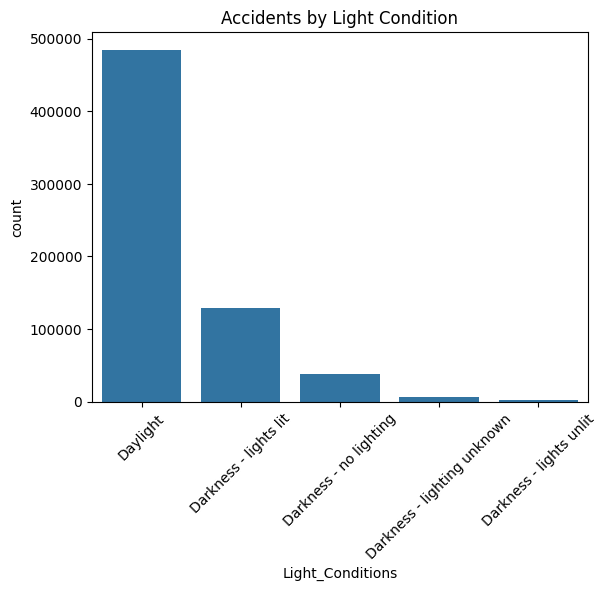

In [32]:
sns.countplot(data=accident_data, x="Light_Conditions", order=accident_data["Light_Conditions"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents by Light Condition")
plt.show()

<h3>Insight: Reveals the impact of daylight vs. darkness.</h3>

<h2>24.How did accidents differ by Road Type each year?</h2>

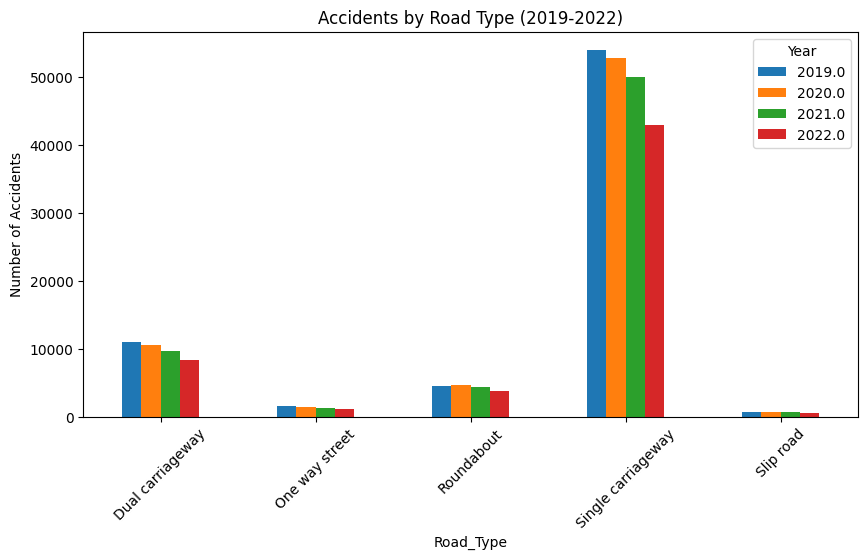

In [40]:
road_data = accident_data.groupby(['Year', 'Road_Type'])['Index'].count()
road_data = road_data.unstack(level=0)

road_data.plot(kind='bar', figsize=(10, 5), title='Accidents by Road Type (2019-2022)')
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>Insight: Urban roads and A-roads consistently show the highest accident counts, while motorways have fewer accidents, likely due to stricter speed controls and fewer intersections.</h3>

<h2>25. Road type vs. accident frequency</h2>

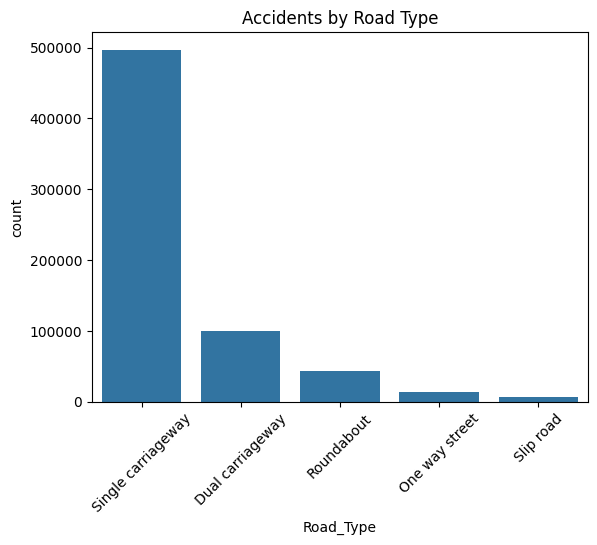

In [36]:
sns.countplot(data=accident_data, x="Road_Type", order=accident_data["Road_Type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents by Road Type")
plt.show()

<h3>Insight: Identifies the road type where accidents are most frequent.</h3>

<h2>26.How did accidents vary by Day of Week across different years?</h2>

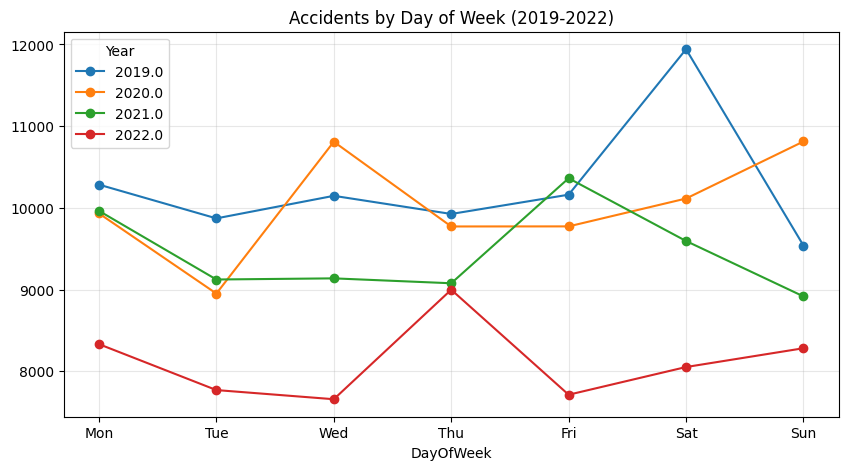

In [39]:
dow_data = accident_data.groupby(['Year', 'DayOfWeek'])['Index'].count()

dow_data = dow_data.unstack(level=0)

dow_data.plot(marker='o', figsize=(10, 5), title='Accidents by Day of Week (2019-2022)')
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.grid(alpha=0.3)
plt.show()

<h2>27.How did Weather Conditions affect accidents over the years?</h2>

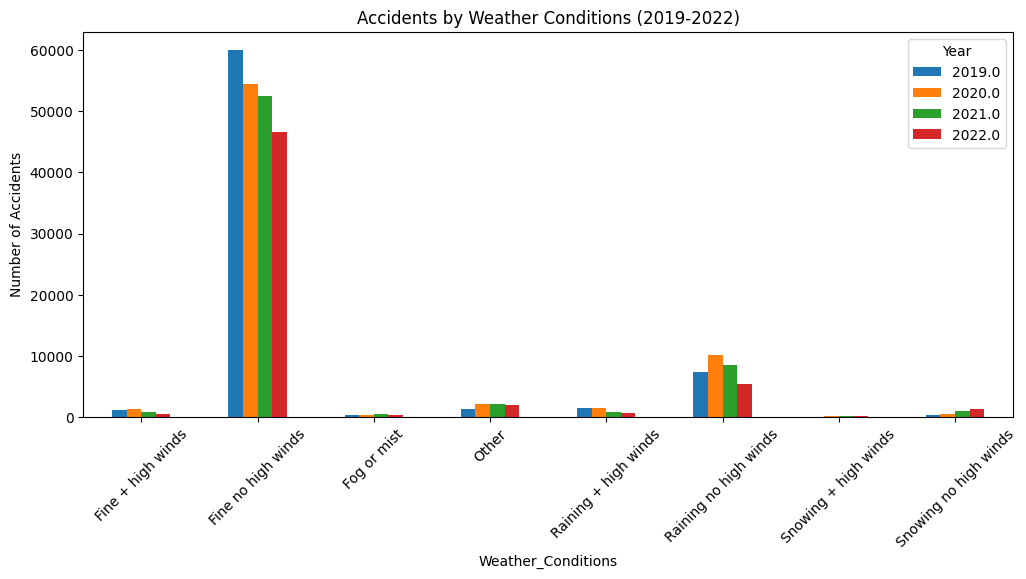

In [41]:
weather_data = accident_data.groupby(['Year', 'Weather_Conditions'])['Index'].count()
weather_data = weather_data.unstack(level=0)

weather_data.plot(kind='bar', figsize=(12, 5), title='Accidents by Weather Conditions (2019-2022)')
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>Insight: Most accidents occur in fine weather, not bad weather, showing that driver behavior plays a bigger role than weather alone. However, rainy and wet conditions still show spikes, highlighting reduced road safety in poor weather.</h3>

<h2>28.How many accidents happened under different Light Conditions each year?</h2>

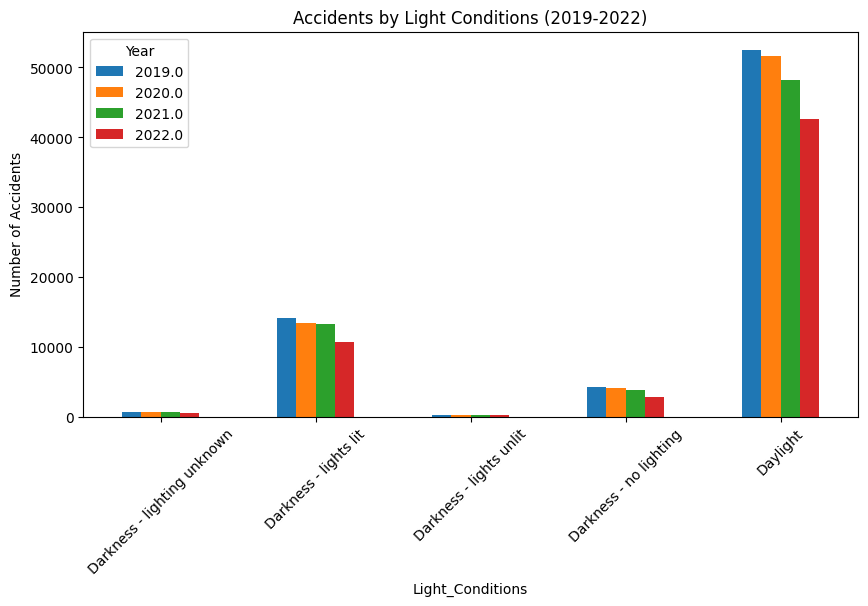

In [44]:
light_data = accident_data.groupby(['Year', 'Light_Conditions'])['Index'].count()
light_data = light_data.unstack(level=0)

light_data.plot(kind='bar', figsize=(10, 5), title='Accidents by Light Conditions (2019-2022)')
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


<h3>Insight: The majority of accidents occur in daylight, simply because traffic volume is higher. But when comparing proportions, accidents in darkness with street lights off are more severe and riskier.</h3>

<h2>29.What is the trend of accidents by Accident Severity across years?</h2>

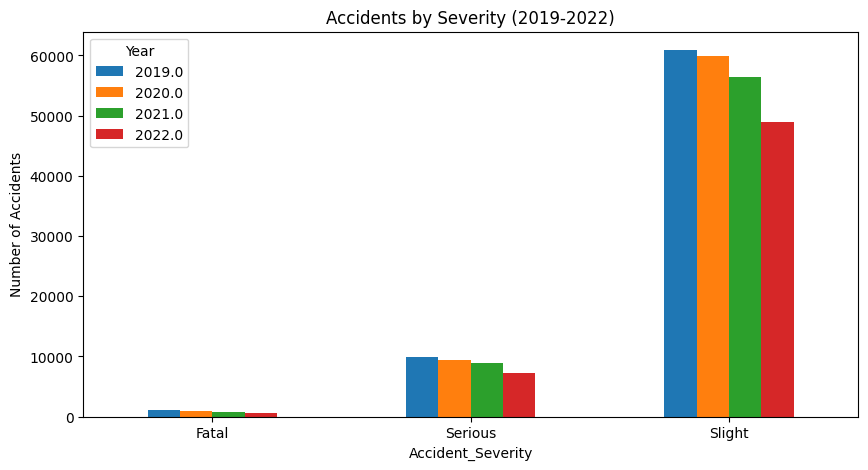

In [46]:
severity_data = accident_data.groupby(['Year', 'Accident_Severity'])['Index'].count()
severity_data = severity_data.unstack(level=0)

severity_data.plot(kind='bar', figsize=(10, 5), title='Accidents by Severity (2019-2022)')
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

<h3>Insight: The majority of accidents are classified as slight, while serious and fatal accidents make up a smaller share. This suggests that while accidents are frequent, most are not life-threatening.</h3>

<h2>30.How do accidents differ between urban and rural areas by year?</h2>

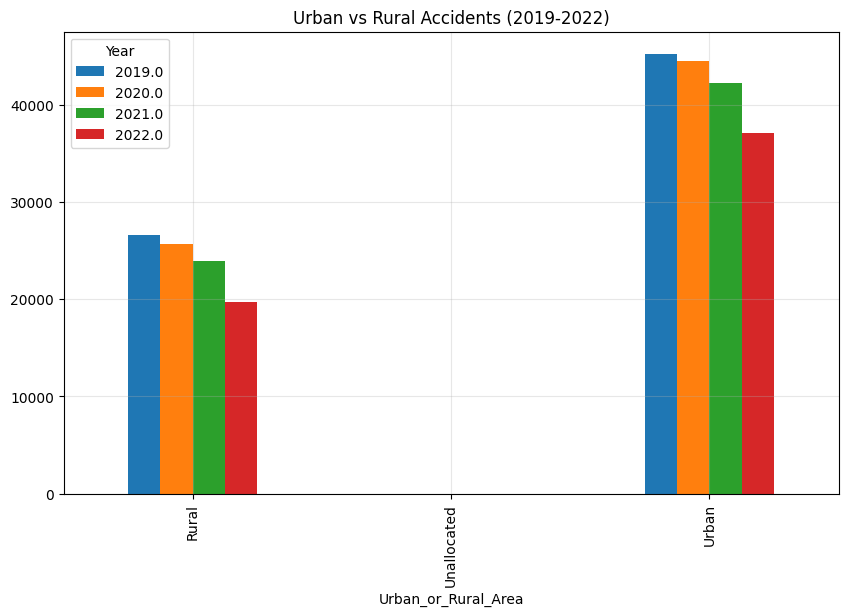

In [51]:
urban_rural = accident_data.groupby(['Year', 'Urban_or_Rural_Area']).size()
urban_rural = urban_rural.unstack(level=0)

urban_rural.plot(kind='bar', figsize=(10, 6), title='Urban vs Rural Accidents (2019-2022)')
plt.grid(alpha=0.3)
plt.show()


<h3>Insight: Urban areas usually record more accidents due to dense traffic, but rural accidents often have higher severity.</h3>